 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
start
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
done


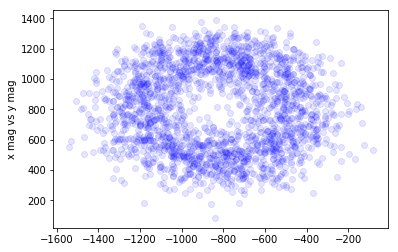

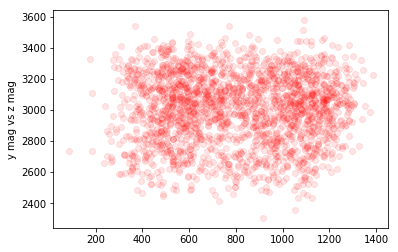

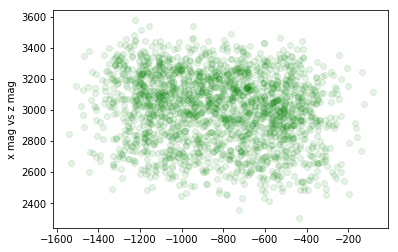

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from zumi.zumi import Zumi
zumi = Zumi() 
zumi.MIN_I2C_DELAY = 0.0

#number of samples you wish to collect
sample_number = 100

#create list necessary
compass_list_x = []
compass_list_y = []
compass_list_z = []
compass_x_y = []
compass_x_z = []
compass_y_z = []
print("start")

#make zumi spin around
zumi.control_motors(10,-10)

#do it for 200 samples
for i in range(sample_number):
    #grab compass data from all axis
    [x,y,z,t] = zumi.compass.get_data()
    compass_list_x.append(x)
    compass_list_y.append(y)
    compass_list_z.append(z)
    #print something to know it is still runnning
    if(i%100 == 0):
        print(".")
        
#stop the motors
zumi.stop()
print("done")

#plot all the data 
plt.plot(compass_list_x,compass_list_y,'bo',alpha=0.1)
plt.ylabel('x mag vs y mag')
plt.show()

plt.plot(compass_list_y,compass_list_z,'ro',alpha=0.1)
plt.ylabel('y mag vs z mag')
plt.show()

plt.plot(compass_list_x,compass_list_z,'go',alpha=0.1)
plt.ylabel('x mag vs z mag')
plt.show()

#write the data to the text files
file = open("comp_data_x.txt", "a")
for val in compass_list_x:
    file.write(str(val)+"\n")
file.close()

file = open("comp_data_y.txt", "a")
for val in compass_list_y:
    file.write(str(val)+"\n")
file.close()

file = open("comp_data_z.txt", "a")
for val in compass_list_z:
    file.write(str(val)+"\n")
file.close()


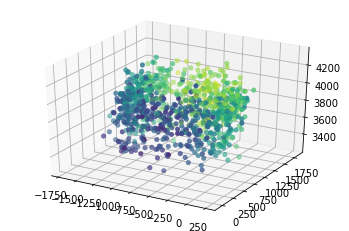

In [7]:
#this creates a 3D graph of the sphere
ax = plt.axes(projection='3d')
ax.scatter3D(compass_list_x, compass_list_y, compass_list_z, c=compass_list_y, cmap='viridis', linewidth=0.5);

saved values to text file
-2431
657
3088
-887.0

-471
2667
3138
1098.0

3616
6936
3320
5276.0

-887.0  x  3088
1098.0  y  3138
5276.0  z  3320


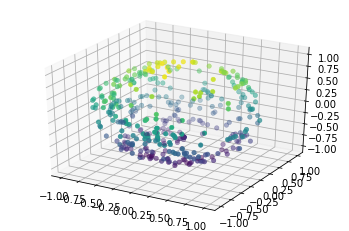

In [93]:
#this calibrates the compass with a min and max approximation
#it is not as accurate

#calculate midpoints and scaling factors
min_x = min(compass_list_x)
max_x = max(compass_list_x)
length_x = max_x - min_x
midpoint_x = length_x/2+min_x

min_y = min(compass_list_y)
max_y = max(compass_list_y)
length_y = max_y - min_y
midpoint_y = length_y/2+min_y

min_z = min(compass_list_z)
max_z = max(compass_list_z)
length_z = max_z - min_z
midpoint_z = length_z/2+min_z

#write in the text file in order to add the min and maxes
file = open("compass_calibration_data.txt", "w+")
file.write(      str(min_x)+ "\n" + str(max_x) +
          "\n" + str(min_y)+ "\n" + str(max_y) +
          "\n" + str(min_z)+ "\n" + str(max_z) )
file.close()

print(min_x)
print(max_x)
print(length_x)
print(midpoint_x)
print("")

print(min_y)
print(max_y)
print(length_y)
print(midpoint_y)
print("")

print(min_z)
print(max_z)
print(length_z)
print(midpoint_z)
print("")

#create new list to adjust for each axis
adj_comp_x = []
for i in compass_list_x:
    val = (i-midpoint_x)*2/length_x
    adj_comp_x.append(val)

adj_comp_y = []
for i in compass_list_y:
    val = (i-midpoint_y)*2/length_y
    adj_comp_y.append(val)  
    
adj_comp_z = []
for i in compass_list_z:
    val = (i-midpoint_z)*2/length_z
    adj_comp_z.append(val)  
    
#plot it out so you can see it the sphere should be centered around (0,0,0) x,y,z    
ax = plt.axes(projection='3d')
ax.scatter3D(adj_comp_x, adj_comp_y, adj_comp_z, c=adj_comp_z, cmap='viridis', linewidth=0.5);

print(midpoint_x," x ",length_x)
print(midpoint_y," y ",length_y)
print(midpoint_z," z ",length_z)

Creating new offset file...
.
.
start
done


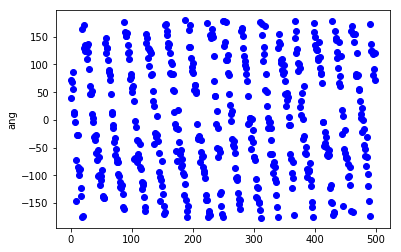

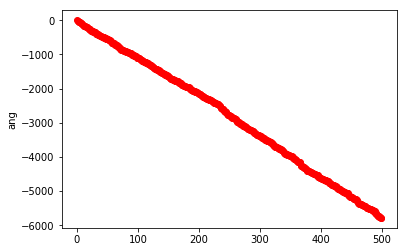

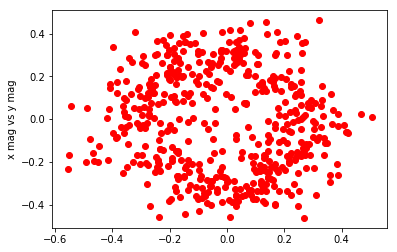

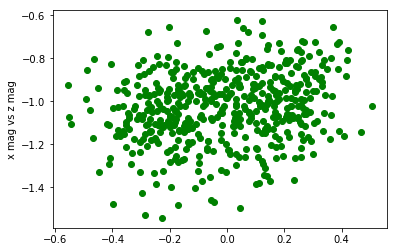

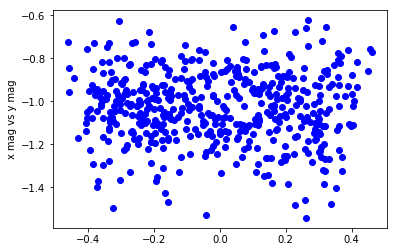

In [80]:
#this test the adjustment in order 
#to calculate the compass angle
angle_list = []
z_ang = []
x_new_list = []
y_new_list = []
z_new_list = []

zumi.reset_gyro()
zumi.mpu.calibrate_MPU(100)
print("start")

#basically drive zumi around in a circle
zumi.control_motors(-3,3)
for i in range(500):

    ang_value = zumi.update_angles()[2]
    z_ang.append(ang_value)
    [x,y,z,t] = zumi.compass.get_data()

    x_new = -1*(x-midpoint_x)*2/length_x
    x_new_list.append(x_new)
    y_new = (y-midpoint_y)*2/length_y
    y_new_list.append(y_new)
    z_new = (z-midpoint_z)*2/length_z
    z_new_list.append(z_new)
    angle = math.degrees(math.atan2(y_new, x_new))
    angle_list.append(angle)
zumi.stop()
print("done")    
plt.plot(angle_list,'bo')
plt.ylabel('ang')
plt.show()

plt.plot(z_ang,'ro')
plt.ylabel('ang')
plt.show()

plt.plot(x_new_list,y_new_list,'ro')
plt.ylabel('x mag vs y mag')
plt.show()

plt.plot(x_new_list,z_new_list,'go')
plt.ylabel('x mag vs z mag')
plt.show()

plt.plot(y_new_list,z_new_list,'bo')
plt.ylabel('x mag vs y mag')
plt.show()